In [1]:
import skimage
import cv2 as cv
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
from typing import List, Union, Tuple

In [3]:
def imshow(mat: List[List[Union[List[int], int]]]) -> None:
  dim = len(np.shape(mat))
  if dim > 2: display(Image.fromarray(mat[:,:,::-1]))
  else:
    display(Image.fromarray(np.repeat(mat[:,:,np.newaxis], repeats=3, axis=2)))
  return

In [4]:
def imshape(mat: List[List[Union[List[int], int]]]) -> Tuple[int, int, int]:
  shapes = np.shape(mat)
  dim = len(shapes)
  return *shapes[:2], shapes[2] if dim > 2 else None

In [5]:
SIZE = (224, 224)

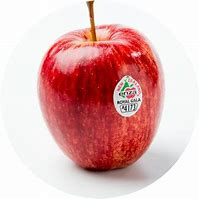

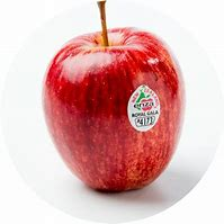

In [6]:
apple = cv.imread('../data/train/apple/70.jpg')
imshow(apple)
imshow(cv.resize(apple, dsize=SIZE))

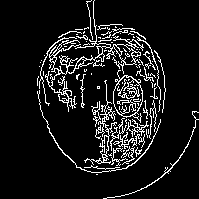

In [7]:
edge = cv.Canny(apple, threshold1=0, threshold2=255)
imshow(edge)

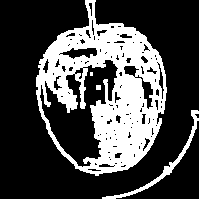

In [8]:
edge = cv.dilate(edge, None)
imshow(edge)

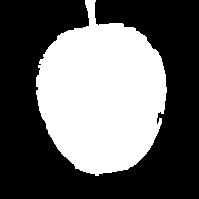

In [9]:
contour = sorted(cv.findContours(edge, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2],
                 key=cv.contourArea)[-1]
mask = cv.drawContours(np.zeros(imshape(edge)[:2], np.uint8), [contour], -1, 255, -1)
imshow(mask)

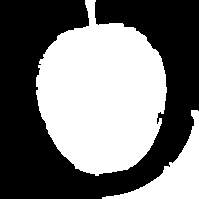

In [10]:
h, w, _ = imshape(edge)
test_mask = np.zeros((h+2, w+2), np.uint8)
im_floodfill = edge.copy()
cv.floodFill(im_floodfill, test_mask, (0,0), 255)
im_floodfill_inv = cv.bitwise_not(im_floodfill)
im_out = edge | im_floodfill_inv
imshow(im_out)

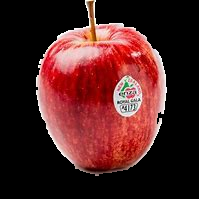

In [11]:
segmented = cv.bitwise_and(apple, apple, mask=mask)
imshow(segmented)